In [1]:
from recast import CPT
import numpy as np


# Croatian site 

In [2]:
# Sibenik
layout = CPT()
layout.MESH_EXTENT = 3500 # m
layout.AVERAGE_RANGE = 4000
layout.set_path('/Users/niva/Desktop/recast-test', 
                path_type = 'output')

# setting path to the landcover data 
layout.set_path('/Volumes/Secondary_Drive/work/projects/campaign-planning-tool/data/input/landcover/g100_clc12_V18_5.tif', 
                path_type = 'landcover')

layout.set_utm_zone('54H')
layout.MAX_ELEVATION_ANGLE = 5


points = np.array([
[604812,5795092,84],
[604533,5794832,84],
[604076,5795064,84],
[603827,5794609,84],
[604351,5794539,84],
[604751,5794414,84],
[604644,5794073,84],
[604139,5794086,84],
[603798,5793941,84],
[604901,5793739,84],
[604528,5793680,84],
[604141,5793590,84],
[603794,5793272,84],
[605251,5793388,84],
[604758,5793220,84],
[604174,5793021,84],
[605136,5792823,84],
[603826,5792839,84],
[604456,5792565,84],
[603817,5792337,84],
[603445,5792592,84],
[602928,5792622,84],
[602476,5792623,84],
[602097,5792628,84],
[605720,5792233,84],
[604910,5792239,84],
[604452,5792016,84],
[603215,5792216,84],
[601901,5792279,84],
[603972,5791929,84],
[603601,5791683,84],
[603051,5791854,84],
])

points[:,2] = points[:,2] + layout.get_elevation(utm_zone='54H', pts_utm=points)
layout.add_measurement_instances(points = points, points_id = 'initial')

layout.generate_mesh()


Path /Users/niva/Desktop/recast-test set for storing CPT outputs
Path /Volumes/Secondary_Drive/work/projects/campaign-planning-tool/data/input/landcover/g100_clc12_V18_5.tif set for landcover data
Correct latitudinal zone!
Correct longitudinal zone!
UTM zone set
Correct latitudinal zone!
Correct longitudinal zone!
Measurement points 'initial' added to the measurements dictionary!
Measurements dictionary contains 1 different measurement type(s).


In [3]:
layout.generate_combined_layer(points_id = 'initial')

Generating combined layer for initial measurement points!
Correct latitudinal zone!
Correct longitudinal zone!
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Combined layer generated with landcover data!


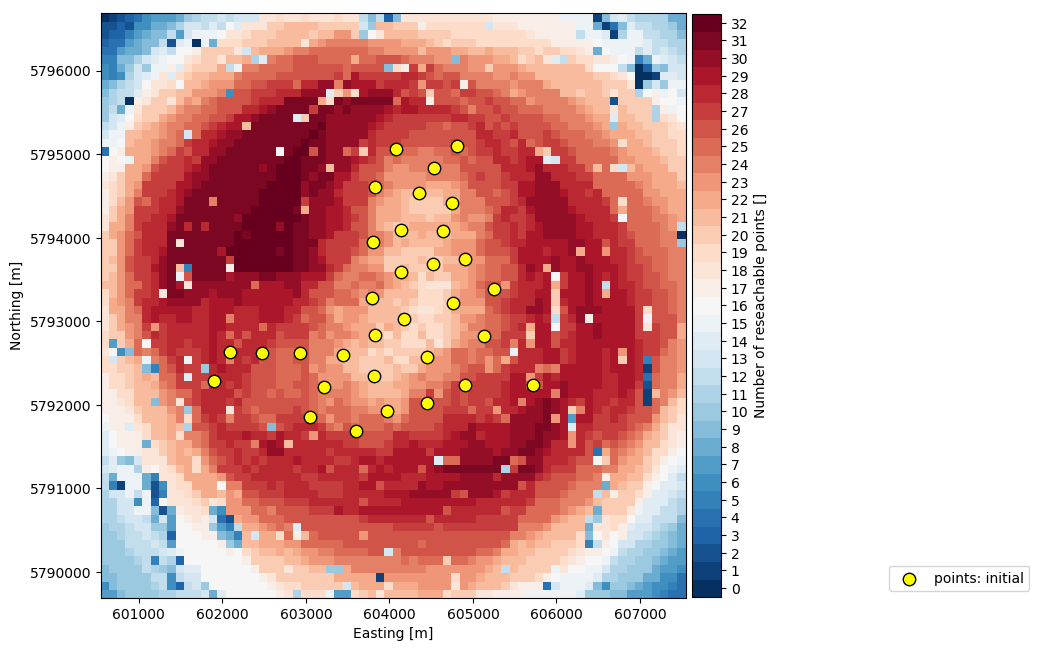

In [4]:
layout.plot_layer(layer_id = 'combined')

In [5]:
layout.add_lidar_instance(position = np.array([602500, 5794000, 179]),
                          lidar_id = 'brise', 
                          layer_id = 'combined')

Lidar 'brise' added to the lidar dictionary, which now contains 1 lidar instance(s).
Updating lidar instance 'brise' considering GIS layer 'combined'.


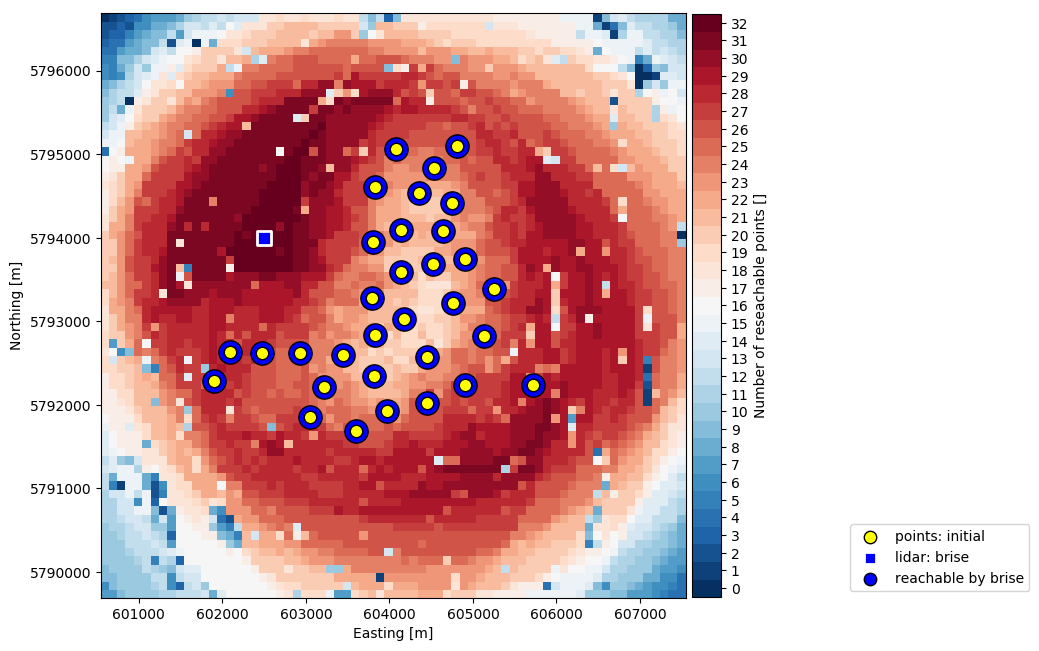

In [6]:
layout.plot_layer(layer_id = 'combined', lidar_ids = ['brise'])

In [7]:
layout.generate_second_lidar_layer(lidar_id = 'brise')

Updating lidar instance 'brise' considering GIS layer 'combined'.


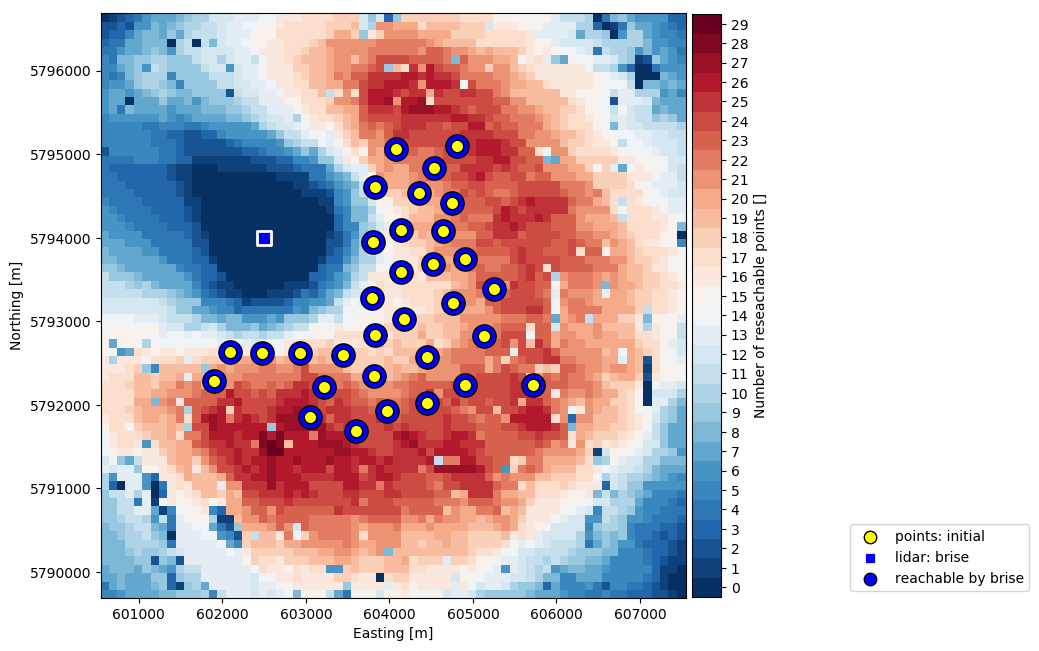

In [8]:
layout.plot_layer(layer_id = 'second_lidar_placement', lidar_ids = ['brise'])

In [9]:
layout.add_lidar_instance(position = np.array([604000, 5791000, 220]),
                          lidar_id = 'sirocco', 
                           layer_id = 'second_lidar_placement')  

Lidar 'sirocco' added to the lidar dictionary, which now contains 2 lidar instance(s).
Updating lidar instance 'sirocco' considering GIS layer 'second_lidar_placement'.


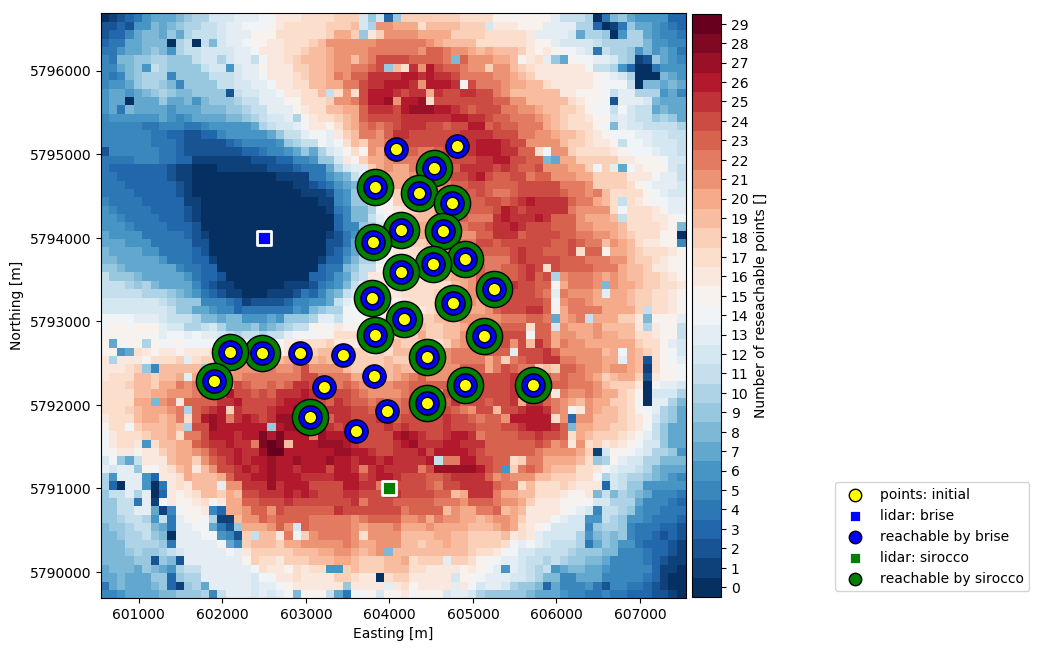

In [10]:
layout.plot_layer(layer_id = 'second_lidar_placement', lidar_ids = ['brise', 'sirocco'])

In [11]:
layout.optimize_trajectory(lidar_ids = ['sirocco', 'brise'], sync = True, only_common_points = True)

Lidar instances:['sirocco', 'brise'] will be updated with the optimized trajectory
Synchronizing trajectories for lidar instances:['sirocco', 'brise']


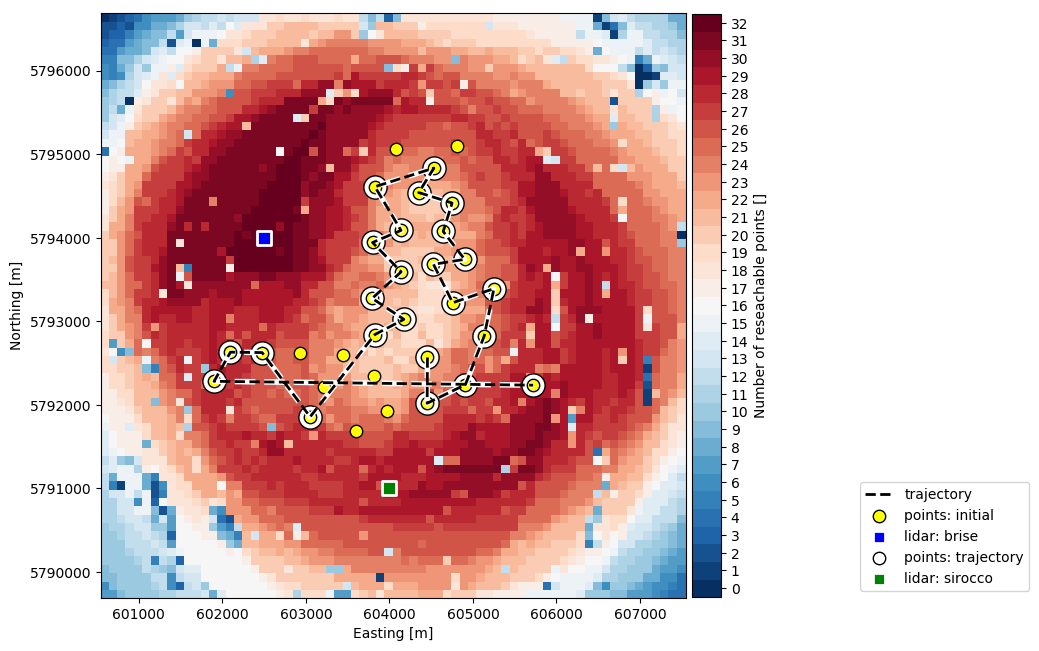

In [12]:
layout.plot_design(layer_id = 'combined', lidar_ids = ['brise', 'sirocco'])